Enter radius (default = 1.0): 1.0
Enter width (default = 0.05): 0.05
Enter resolution (default = 500): 500


<ipython-input-8-b083d14a818a>:82: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_u = np.trapz(dA, axis=1)
<ipython-input-8-b083d14a818a>:83: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  surface_area = np.trapz(area_u, dx=self.w / (self.n - 1))



🎯 Möbius Strip Geometric Properties
--------------------------------------
Surface Area  ≈ 24.95065 units²
Edge Length   ≈ 12.56733 units


<ipython-input-8-b083d14a818a>:60: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


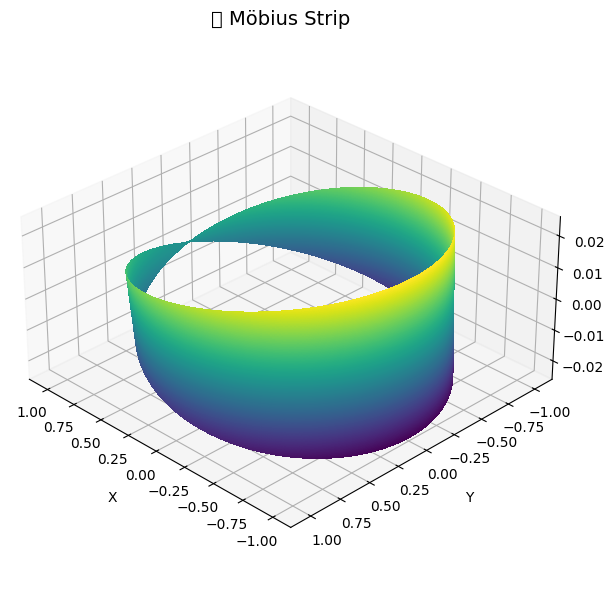

In [8]:
"""
Author: Saishma Chennam
Assignment: Möbius Strip Modeling - Karkhana.io

This script models a Möbius strip using parametric equations,
computes its surface area and edge length, and visualizes it with attractive colors.
"""

import numpy as np
import matplotlib.pyplot as plt

class MobiusStrip:
    def __init__(self, radius=1.0, width=0.05, resolution=500):
        """
        Initializes the Möbius strip parameters and mesh grid.
        :param radius: Distance from center to strip's middle
        :param width: Width of the strip (set low for thin appearance)
        :param resolution: Mesh grid resolution
        """
        self.R = radius
        self.w = width
        self.n = resolution

        self.u_grid, self.v_grid = np.meshgrid(
            np.linspace(0, 2 * np.pi, self.n),
            np.linspace(-self.w / 2, self.w / 2, self.n)
        )

        self.x_vals, self.y_vals, self.z_vals = self._generate_mesh()

    def _generate_mesh(self):
        """Generate x, y, z values using Möbius strip parametric equations."""
        u = self.u_grid
        v = self.v_grid

        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)

        return x, y, z

    def plot(self):
        """Visualize the Möbius strip with smooth gradient coloring."""
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        colors = plt.cm.viridis((self.z_vals - self.z_vals.min()) / (self.z_vals.max() - self.z_vals.min()))

        ax.plot_surface(self.x_vals, self.y_vals, self.z_vals,
                        facecolors=colors,
                        rstride=1, cstride=1,
                        linewidth=0, antialiased=False, shade=False)

        ax.set_title("🌈 Möbius Strip ", fontsize=14)
        ax.set_xlabel("X", labelpad=10)
        ax.set_ylabel("Y", labelpad=10)
        ax.set_zlabel("Z", labelpad=10)
        ax.view_init(elev=30, azim=135)
        ax.set_box_aspect([1, 1, 0.5])
        plt.tight_layout()
        plt.show()

    def compute_surface_area(self):
        """Approximate surface area using numerical integration."""
        u = self.u_grid
        v = self.v_grid

        dx_du = -(self.R + v * np.cos(u / 2)) * np.sin(u) - 0.5 * v * np.sin(u / 2) * np.cos(u)
        dy_du = (self.R + v * np.cos(u / 2)) * np.cos(u) - 0.5 * v * np.sin(u / 2) * np.sin(u)
        dz_du = 0.5 * v * np.cos(u / 2)

        dx_dv = np.cos(u / 2) * np.cos(u)
        dy_dv = np.cos(u / 2) * np.sin(u)
        dz_dv = np.sin(u / 2)

        cross_x = dy_du * dz_dv - dz_du * dy_dv
        cross_y = dz_du * dx_dv - dx_du * dz_dv
        cross_z = dx_du * dy_dv - dy_du * dx_dv

        dA = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)

        area_u = np.trapz(dA, axis=1)
        surface_area = np.trapz(area_u, dx=self.w / (self.n - 1))

        return surface_area

    def compute_edge_length(self):
        """Compute the Möbius strip edge length."""
        u_vals = np.linspace(0, 4 * np.pi, 4 * self.n)
        v = self.w / 2  # Edge

        x = (self.R + v * np.cos(u_vals / 2)) * np.cos(u_vals)
        y = (self.R + v * np.cos(u_vals / 2)) * np.sin(u_vals)
        z = v * np.sin(u_vals / 2)

        points = np.stack((x, y, z), axis=1)
        diffs = np.diff(points, axis=0)
        lengths = np.linalg.norm(diffs, axis=1)

        return np.sum(lengths)


# --- Main Execution Block ---
if __name__ == "__main__":
    # Static defaults (recommended)
    R, w, n = 1.0, 0.05, 500
    try:
      R = float(input("Enter radius (default = 1.0): ") or R)
      w = float(input("Enter width (default = 0.05): ") or w)
      n = int(input("Enter resolution (default = 500): ") or n)
    except ValueError:
      print("Invalid input. Using default values.")

    strip = MobiusStrip(radius=R, width=w, resolution=n)

    surface_area = strip.compute_surface_area()
    edge_length = strip.compute_edge_length()

    print("\n🎯 Möbius Strip Geometric Properties")
    print("--------------------------------------")
    print(f"Surface Area  ≈ {surface_area:.5f} units²")
    print(f"Edge Length   ≈ {edge_length:.5f} units")

    strip.plot()
